# Analyze Data

## Summarize Data

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
from acquire_prepare import acquire_oil
from acquire_prepare import prep_data
import numpy as np
import pandas as pd

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import sys # used in command to make entire array print by default
import seaborn as sns
from scipy.stats import iqr

# Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# makes entire array print by default, can add [:##] to end to set length
np.set_printoptions(threshold=sys.maxsize)

In [4]:
df = acquire_oil()
df = prep_data(df)

### Data Structure

In [5]:
df.shape

(9111, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9111 entries, 8 to 17144
Data columns (total 37 columns):
api14                 9111 non-null int64
lease_name            9111 non-null object
well_number           9111 non-null object
county                9111 non-null object
type                  9111 non-null category
status                9111 non-null category
oper                  9111 non-null object
multi_well_lease      9111 non-null bool
major_phase           9111 non-null category
formation             9108 non-null object
proppant_ppf          7901 non-null float64
prod_method           9111 non-null category
frac_fluid_gpf        9111 non-null float64
lateral_len           9111 non-null float64
frac_stages           8617 non-null float64
frac_fluid_type       9111 non-null object
first_prod            9111 non-null datetime64[ns]
last_prod             9111 non-null datetime64[ns]
oil_gravity           8871 non-null float64
peak_boepd            9111 non-null float64
oil_hist  

In [7]:
df.sample(10)

,api14,lease_name,well_number,county,type,status,oper,multi_well_lease,major_phase,formation,...,well_id,mid_point_lat,mid_point_long,recovery,recovery_per_foot,months_active,recovery_per_month,lateral_class,vintage,vintage_bin
11859,42383008200001,E G CAUBLE,3,REAGAN,Vertical,Inactive,remuda operating company incorporate,False,OIL,DEAN,...,95831,31.630640,-101.629750,3.829500,24.866883,10,382.950000,one,1994,3
2265,42165351890100,ROBERTSON UNIT,98H,GAINES,Horizontal,Active,sabinal energy operating llc,True,OIL,CLEAR FORK,...,145036,32.574907,-102.712845,113.010500,78.425052,227,497.843613,two,2000,3
908,42103353360000,MCELROY J T CONS,1422H,CRANE,Horizontal,Active,chevron,True,OIL,GRAYBURG,...,141397,31.424257,-102.354934,67.759500,31.886824,142,477.179577,three,2007,4
15133,42431333380000,HILDEBRAND 16,1H,STERLING,Horizontal,Active,stanolind production llc,False,OIL,Wolfcamp D,...,150343,31.755591,-101.197178,59.009002,30.878599,85,694.223557,two,2012,4
8183,42329311510001,SCHARBAUER C-27,327,MIDLAND,Vertical,Inactive,diamondback exploration & prod llc,False,OIL,FUSSELMAN,...,153176,32.013939,-102.205223,2.702000,42.888889,147,18.380952,one,1998,3
10592,42329410430000,PARKS FIELD UNIT 2,1450LH,MIDLAND,Horizontal,Active,cog,True,OIL,SPRABERRY,...,146997,31.830199,-102.140408,162.635508,15.256614,25,6505.420320,eleven,2017,5
655,42003473420000,UL CARPENTER 7-20 UNIT,3LS,ANDREWS,Horizontal,Active,diamondback exploration & prod llc,True,OIL,SPRABERRY,...,142482,32.383355,-102.252445,257.157683,25.592922,26,9890.680103,eleven,2017,5
476,42003460210000,FIRENZE,419H,ANDREWS,Horizontal,Inactive,lime rock resources iv a lp,False,OIL,SAN ANDRES,...,143298,32.497839,-102.697959,4.567334,1.188791,9,507.481504,four,2014,5
6049,42235353330000,FAUDREE,15H,IRION,Horizontal,Active,sem operating company llc,True,OIL,WOLFCAMP,...,143598,31.135403,-101.009169,157.202175,18.194696,65,2418.495003,nine,2013,4
17091,42501365830000,BOOMER 727,1H,YOAKUM,Horizontal,Active,wishbone texas operating company llc,True,OIL,SAN ANDRES,...,152753,33.044625,-102.992239,45.905000,10.582066,43,1067.558147,five,2015,5


### Data Distributions

In [8]:
print (df.apply(lambda x: x.nunique()))

api14                 9088
lease_name            4067
well_number           3532
county                  40
type                     2
status                   2
oper                   356
multi_well_lease         2
major_phase              3
formation               41
proppant_ppf          7805
prod_method              9
frac_fluid_gpf        8935
lateral_len           4967
frac_stages             63
frac_fluid_type         10
first_prod             503
last_prod              357
oil_gravity            140
peak_boepd            8776
oil_hist              8932
gas_hist              8904
gor_hist              9109
ip90_boeqpd           8965
landing_depth         4305
sur_lat               8821
sur_long              8976
well_id               9111
mid_point_lat         9025
mid_point_long        9030
recovery              9104
recovery_per_foot     9110
months_active          405
recovery_per_month    9038
lateral_class           14
vintage                 59
vintage_bin              5
d

In [9]:
df.drop(columns=['api14', 'sur_lat', 'sur_long', 'well_id', 'mid_point_lat', 
                 'mid_point_long', 'landing_depth']).describe()

,proppant_ppf,frac_fluid_gpf,lateral_len,frac_stages,oil_gravity,peak_boepd,oil_hist,gas_hist,gor_hist,ip90_boeqpd,recovery,recovery_per_foot,months_active,recovery_per_month,vintage,vintage_bin
count,7901.000000,9111.000000,9111.000000,8617.000000,8871.000000,9111.000000,9111.000000,9111.000000,9111.000000,9111.000000,9111.000000,9111.000000,9111.000000,9111.000000,9111.000000,9111.000000
mean,1156.279041,1009.888433,5172.729777,2.906812,1.765188,456.920233,114.086108,351.319162,3744.922869,313.274693,144.982498,50.362981,70.498628,inf,2010.125672,4.348151
std,1538.448069,760.590435,3169.468670,8.989653,8.968751,439.033570,98.094715,384.418922,3849.852441,311.683503,142.761965,100.043607,76.340453,NaN,9.945555,0.882422
min,1.098097,0.015129,2.000000,0.000000,0.000000,0.131508,0.026000,0.001000,0.201732,0.001812,0.000000,0.000000,0.000000,0.000000,1958.000000,1.000000
25%,528.200562,212.993264,2089.000000,0.000000,0.000000,93.252565,36.467500,67.371000,1250.358825,51.932235,44.865418,14.224450,33.000000,641.746799,2011.000000,4.000000
50%,1157.637700,1054.888000,5043.000000,0.000000,0.000000,363.306100,92.798000,245.713000,2379.901860,245.019928,115.696170,23.497067,51.000000,2312.166785,2014.000000,5.000000
75%,1598.367550,1587.353150,7622.000000,0.000000,0.000000,677.025604,167.217000,503.609500,4793.533650,475.007470,190.867501,42.053703,71.000000,4510.027640,2015.000000,5.000000
max,122666.664000,2997.879640,13581.000000,70.000000,68.000000,6118.757000,863.992000,4007.768000,19968.130000,4752.926000,999.305470,997.824074,726.000000,inf,2018.000000,5.000000


#### Noticed a really large proppant_ppf that I thought we'd dropped...

In [10]:
df['proppant_ppf'].max()

122666.664

#### Calculate most extreme outliers of proppant_ppf and drop them

In [11]:
outliers=[]
threshold = 6
mean_1 = np.mean(df.proppant_ppf)
std_1 = np.std(df.proppant_ppf)
for y in df.proppant_ppf:
    z_score=(y - mean_1)/std_1
    if np.abs(z_score) > threshold:
        outliers.append(y)
print(outliers)

[122666.664, 13484.333]


In [12]:
df = df[~df['proppant_ppf'].isin(outliers)]

In [13]:
df.drop(columns=['api14', 'sur_lat', 'sur_long', 'well_id', 'mid_point_lat', 
                 'mid_point_long', 'landing_depth']).describe()

,proppant_ppf,frac_fluid_gpf,lateral_len,frac_stages,oil_gravity,peak_boepd,oil_hist,gas_hist,gor_hist,ip90_boeqpd,recovery,recovery_per_foot,months_active,recovery_per_month,vintage,vintage_bin
count,7899.000000,9109.000000,9109.000000,8615.000000,8869.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000
mean,1139.335321,1009.827315,5173.862224,2.907487,1.765586,457.012901,114.109502,351.393954,3745.222603,313.339589,145.012285,50.253180,70.506532,inf,2010.126578,4.348227
std,691.707854,760.639743,3168.894876,8.990587,8.969723,439.037216,98.092736,384.427972,3850.181017,311.686937,142.763444,99.641652,76.345719,NaN,9.946183,0.882504
min,1.098097,0.015129,2.000000,0.000000,0.000000,0.131508,0.026000,0.001000,0.201732,0.001812,0.000000,0.000000,0.000000,0.000000,1958.000000,1.000000
25%,528.196015,212.841600,2102.000000,0.000000,0.000000,93.337494,36.539000,67.411000,1250.599850,52.010990,44.891833,14.223651,33.000000,642.000030,2011.000000,4.000000
50%,1157.576000,1054.888000,5043.000000,0.000000,0.000000,363.317047,92.810000,245.736000,2379.901860,245.045288,115.739174,23.496582,51.000000,2313.146366,2014.000000,5.000000
75%,1598.101805,1587.292240,7622.000000,0.000000,0.000000,677.105042,167.218000,503.687000,4793.809000,475.042100,190.887834,42.035915,71.000000,4510.070904,2015.000000,5.000000
max,9248.209000,2997.879640,13581.000000,70.000000,68.000000,6118.757000,863.992000,4007.768000,19968.130000,4752.926000,999.305470,997.824074,726.000000,inf,2018.000000,5.000000


## Standardize Numeric Data

In [14]:
numerics = ['int64', 'float64', 'float']

num_df = df.select_dtypes(include=numerics)
num_df.columns

Index(['api14', 'proppant_ppf', 'frac_fluid_gpf', 'lateral_len', 'frac_stages',
       'oil_gravity', 'peak_boepd', 'oil_hist', 'gas_hist', 'gor_hist',
       'ip90_boeqpd', 'landing_depth', 'sur_lat', 'sur_long', 'well_id',
       'mid_point_lat', 'mid_point_long', 'recovery', 'recovery_per_foot',
       'months_active', 'recovery_per_month', 'vintage', 'vintage_bin'],
      dtype='object')

In [15]:
num_df = num_df.drop(columns=['gas_hist', 'recovery_per_foot', 
                              'recovery_per_month', 'landing_depth', 'api14',
                             'sur_long', 'sur_lat', 'mid_point_lat', 'mid_point_long',
                             'well_id', 'oil_hist'])

### Use LabelEncoder to encode county and frak_fluid_type.

#### for county:

In [16]:
df.county.value_counts(dropna=False)

REAGAN        1612
MIDLAND       1044
UPTON          868
GLASSCOCK      794
LOVING         703
HOWARD         675
IRION          576
MARTIN         520
CROCKETT       511
ANDREWS        441
CRANE          204
ECTOR          147
PECOS          144
HOCKLEY        141
YOAKUM         103
GAINES          92
CULBERSON       88
WINKLER         66
CHAVES          53
BORDEN          46
TERRY           46
STERLING        40
COCHRAN         37
SCURRY          28
SCHLEICHER      26
DAWSON          23
WARD            18
MITCHELL        14
GARZA           14
REEVES           8
LYNN             7
LUBBOCK          7
EDDY             3
LEA              2
COKE             2
KING             2
TERRELL          1
CROSBY           1
KENT             1
ROOSEVELT        1
Name: county, dtype: int64

In [17]:
encoder = LabelEncoder()

encoder.fit(df.county)
num_df['county'] = encoder.transform(df.county)

num_df.head()

,proppant_ppf,frac_fluid_gpf,lateral_len,frac_stages,oil_gravity,peak_boepd,gor_hist,ip90_boeqpd,recovery,months_active,vintage,vintage_bin,county
8,213.525986,9.795906,4983.0,0.0,NaN,183.820175,1419.049680,106.681160,84.509333,96,2011,4,2
9,253.196075,278.366364,5197.0,10.0,NaN,265.464478,1613.077390,77.726590,167.561502,108,2010,4,2
10,333.403600,320.419400,4745.0,0.0,NaN,172.198200,1744.061160,114.559784,91.441340,99,2010,4,2
11,1036.424680,894.965637,3871.0,0.0,NaN,33.046757,640.188232,15.327899,11.411500,93,2010,4,2
12,395.533966,313.524200,3783.0,11.0,NaN,382.906219,1312.453370,352.800000,192.647335,109,2010,4,2


#### And for frak_fluid_type:

In [18]:
df.frac_fluid_type.value_counts(dropna=False)

GelXLink      3927
Slickwater    2494
Acid          1379
Freshwater     502
Other          485
Unknown        244
Oil             40
Foam            35
Saltwater        2
N2CO2            1
Name: frac_fluid_type, dtype: int64

In [19]:
encoder = LabelEncoder()
encoder.fit(df.frac_fluid_type)
num_df['frac_fluid_type'] = encoder.transform(df.frac_fluid_type)
num_df.head()

,proppant_ppf,frac_fluid_gpf,lateral_len,frac_stages,oil_gravity,peak_boepd,gor_hist,ip90_boeqpd,recovery,months_active,vintage,vintage_bin,county,frac_fluid_type
8,213.525986,9.795906,4983.0,0.0,NaN,183.820175,1419.049680,106.681160,84.509333,96,2011,4,2,0
9,253.196075,278.366364,5197.0,10.0,NaN,265.464478,1613.077390,77.726590,167.561502,108,2010,4,2,3
10,333.403600,320.419400,4745.0,0.0,NaN,172.198200,1744.061160,114.559784,91.441340,99,2010,4,2,3
11,1036.424680,894.965637,3871.0,0.0,NaN,33.046757,640.188232,15.327899,11.411500,93,2010,4,2,8
12,395.533966,313.524200,3783.0,11.0,NaN,382.906219,1312.453370,352.800000,192.647335,109,2010,4,2,3


## Scale the data:

In [20]:
scaled_df = num_df.copy()
scaled_df['proppant_ppf'] = (scaled_df.proppant_ppf - scaled_df.proppant_ppf.min()) / (scaled_df.proppant_ppf.max() - scaled_df.proppant_ppf.min())
scaled_df['frac_fluid_gpf'] = (scaled_df.frac_fluid_gpf - scaled_df.frac_fluid_gpf.min()) / (scaled_df.frac_fluid_gpf.max() - scaled_df.frac_fluid_gpf.min())
scaled_df['lateral_len'] = (scaled_df.lateral_len - scaled_df.lateral_len.min()) / (scaled_df.lateral_len.max() - scaled_df.lateral_len.min())
scaled_df['frac_stages'] = (scaled_df.frac_stages - scaled_df.frac_stages.min()) / (scaled_df.frac_stages.max() - scaled_df.frac_stages.min())
scaled_df['oil_gravity'] = (scaled_df.oil_gravity - scaled_df.oil_gravity.min()) / (scaled_df.oil_gravity.max() - scaled_df.oil_gravity.min())
scaled_df['peak_boepd'] = (scaled_df.peak_boepd - scaled_df.peak_boepd.min()) / (scaled_df.peak_boepd.max() - scaled_df.peak_boepd.min())
scaled_df['gor_hist'] = (scaled_df.gor_hist - scaled_df.gor_hist.min()) / (scaled_df.gor_hist.max() - scaled_df.gor_hist.min())
scaled_df['ip90_boeqpd'] = (scaled_df.ip90_boeqpd - scaled_df.ip90_boeqpd.min()) / (scaled_df.ip90_boeqpd.max() - scaled_df.ip90_boeqpd.min())
scaled_df['months_active'] = (scaled_df.months_active - scaled_df.months_active.min()) / (scaled_df.months_active.max() - scaled_df.months_active.min())
scaled_df['vintage'] = (scaled_df.vintage - scaled_df.vintage.min()) / (scaled_df.vintage.max() - scaled_df.vintage.min())
scaled_df['county'] = (scaled_df.county - scaled_df.county.min()) / (scaled_df.county.max() - scaled_df.county.min())
scaled_df['frac_fluid_type'] = (scaled_df.frac_fluid_type - scaled_df.frac_fluid_type.min()) / (scaled_df.frac_fluid_type.max() - scaled_df.frac_fluid_type.min())
scaled_df['recovery'] = (scaled_df.recovery - scaled_df.recovery.min()) / (scaled_df.recovery.max() - scaled_df.recovery.min())

scaled_df.head()

,proppant_ppf,frac_fluid_gpf,lateral_len,frac_stages,oil_gravity,peak_boepd,gor_hist,ip90_boeqpd,recovery,months_active,vintage,vintage_bin,county,frac_fluid_type
8,0.022972,0.003263,0.366816,0.000000,NaN,0.030021,0.071056,0.022445,0.084568,0.132231,0.883333,4,0.051282,0.000000
9,0.027262,0.092850,0.382576,0.142857,NaN,0.043365,0.080773,0.016353,0.167678,0.148760,0.866667,4,0.051282,0.333333
10,0.035936,0.106878,0.349289,0.000000,NaN,0.028122,0.087333,0.024103,0.091505,0.136364,0.866667,4,0.051282,0.333333
11,0.111962,0.298529,0.284925,0.000000,NaN,0.005380,0.032051,0.003225,0.011419,0.128099,0.866667,4,0.051282,0.888889
12,0.042655,0.104577,0.278445,0.157143,NaN,0.062559,0.065718,0.074228,0.192781,0.150138,0.866667,4,0.051282,0.333333


## Visualize Data

### Attribute Histograms

In [21]:
xgb_df = scaled_df.drop(columns=['recovery']).copy()

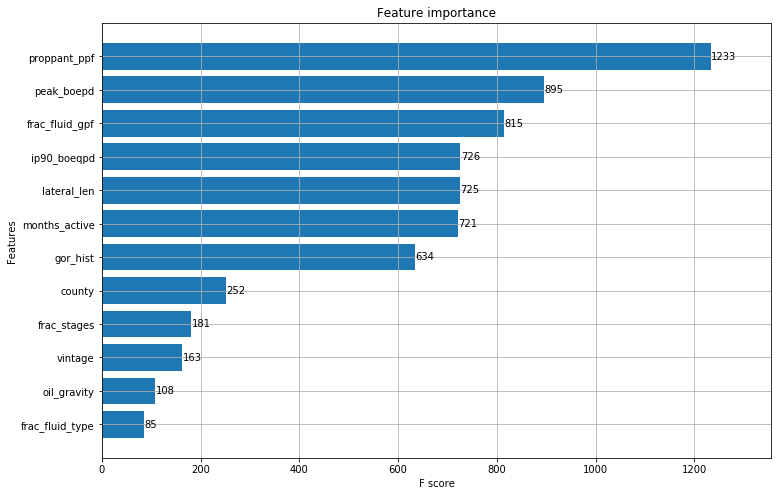

In [22]:
xgb_params = {
    'max_depth': 8,
    'seed' : 493
}
dtrain = xgb.DMatrix(xgb_df, df.recovery, feature_names=xgb_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

#### key features:
'proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf', 'months_active', 'lateral_len', 'ip90_boeqpd', 'county'

### Pairwise Scatterplots of Attributes

In [23]:
scaled_df.shape

(9109, 14)

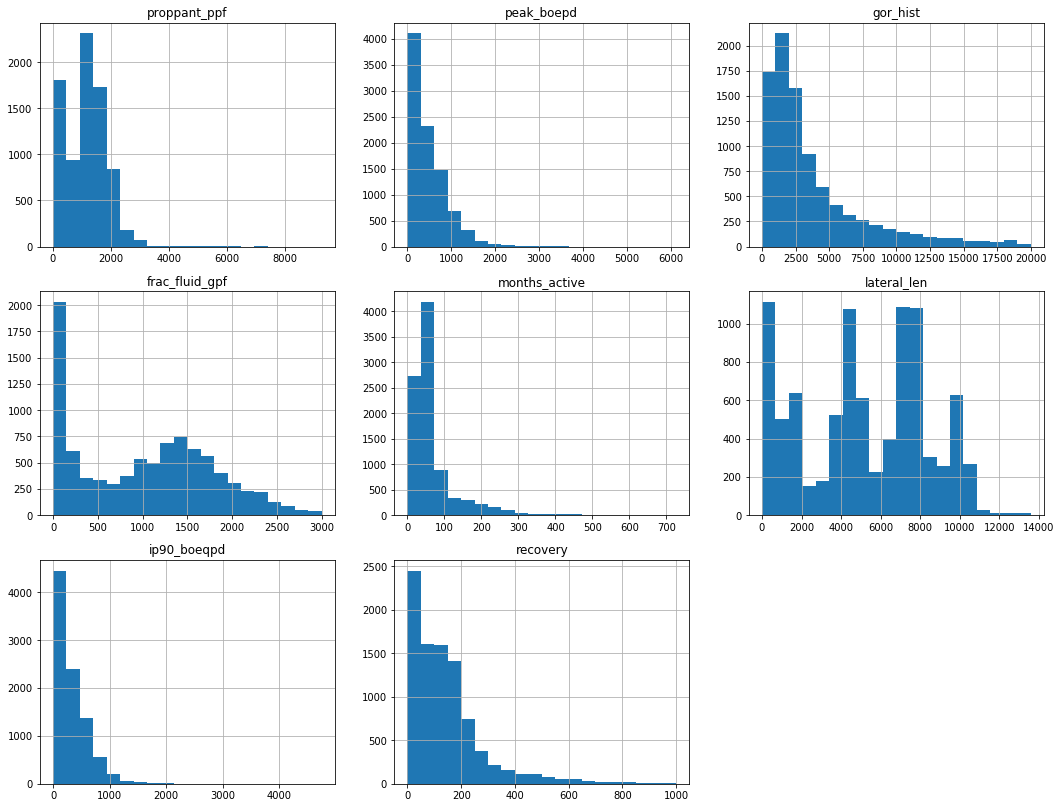

In [24]:
# county was taking a loooong time to plot. Why?
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf', 
          'months_active', 'lateral_len', 'ip90_boeqpd', 'recovery']

plt.figure(figsize=(18,14))
for i, col in enumerate(X_vars):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = scaled_df[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    df[col].hist(bins=20)

#### Tried plotting only county, but still took enormously long to run...

In [25]:
# X_vars = ['county']

# plt.figure(figsize=(18,14))
# for i, col in enumerate(X_vars):  
#     plot_number = i + 1 # i starts at 0, but plot nos should start at 1
#     series = scaled_df[col]
#     plt.subplot(3, 3, plot_number)
#     plt.title(col)
#     df[col].hist(bins=20)

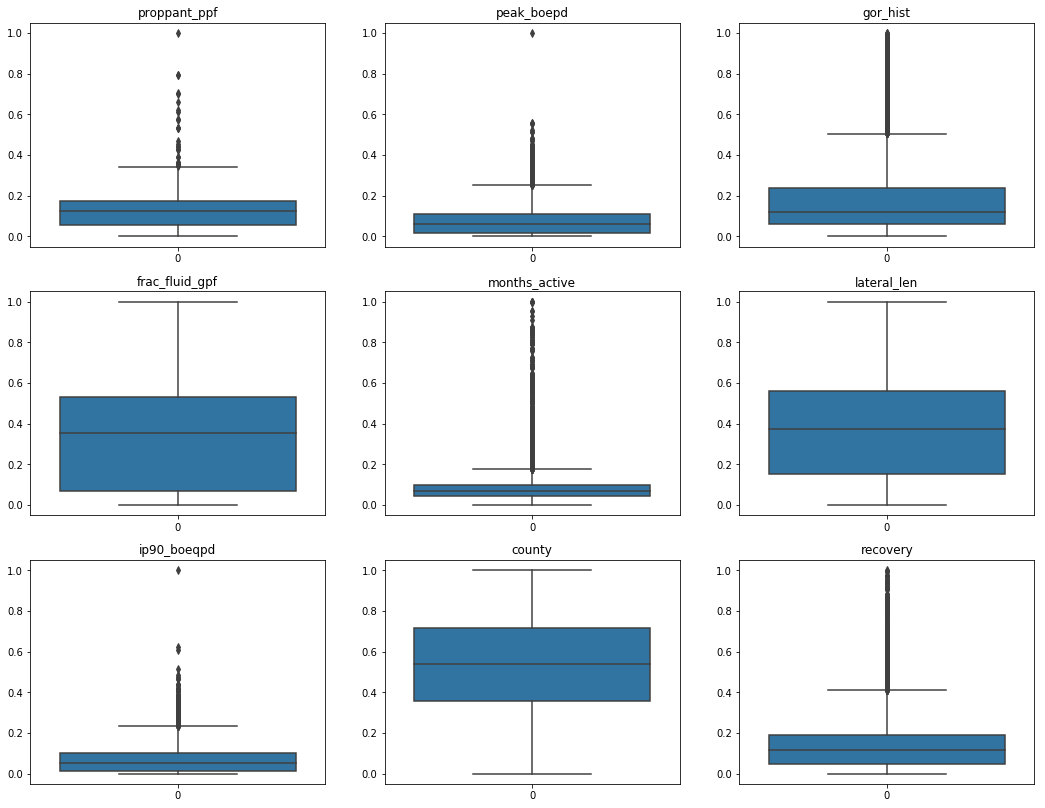

In [26]:
# 13 columns was too big to run, so dropped off 'ip90_boeqpd' and 'county'
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf', 
          'months_active', 'lateral_len', 'ip90_boeqpd', 'county', 'recovery']

plt.figure(figsize=(18,14))
for plot_num, col in enumerate(X_vars):  
    plt.subplot(3, 3, plot_num + 1)
    plt.title(col)
    sns.boxplot(data=scaled_df[col]) 

# There are still a lot of outliers...

#### Create a jointplot for each independent variable (normalized version) with the dependent variable.

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local

<Figure size 1296x1008 with 0 Axes>

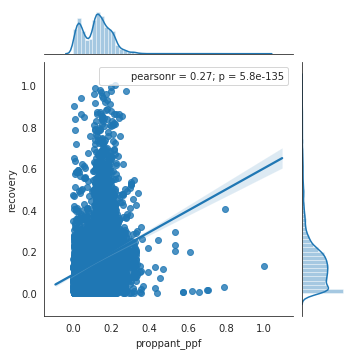

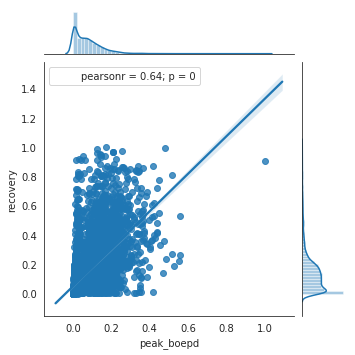

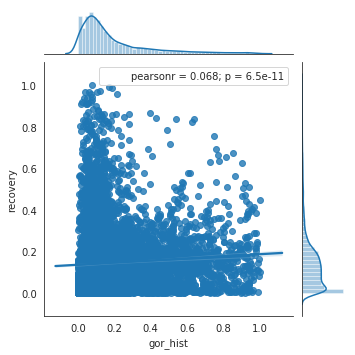

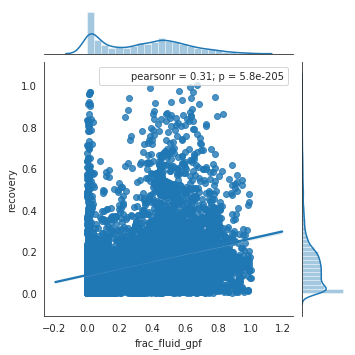

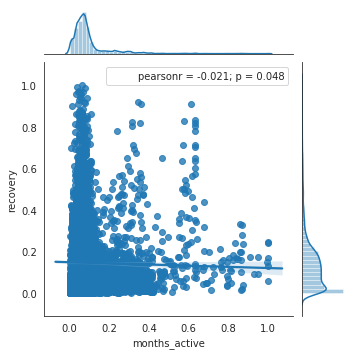

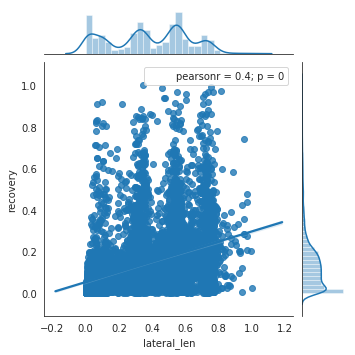

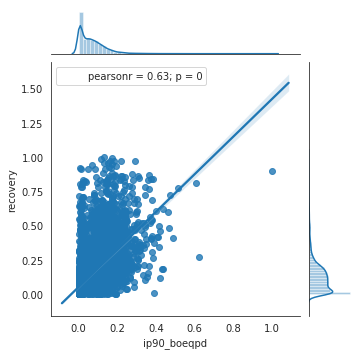

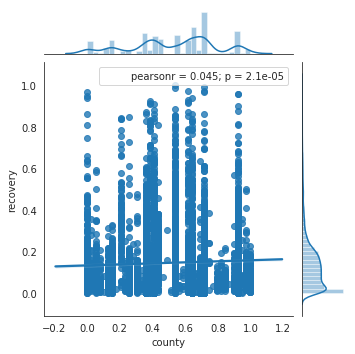

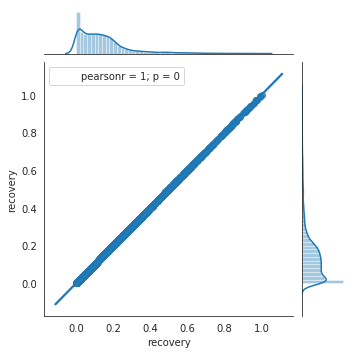

In [27]:
plt.figure(figsize=(18,14))

with sns.axes_style('white'):
    for i, col in enumerate(X_vars):  
        j = sns.jointplot(col, 'recovery', data=scaled_df, kind='reg', height=5);
        j.annotate(stats.pearsonr)

plt.show()

### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent).

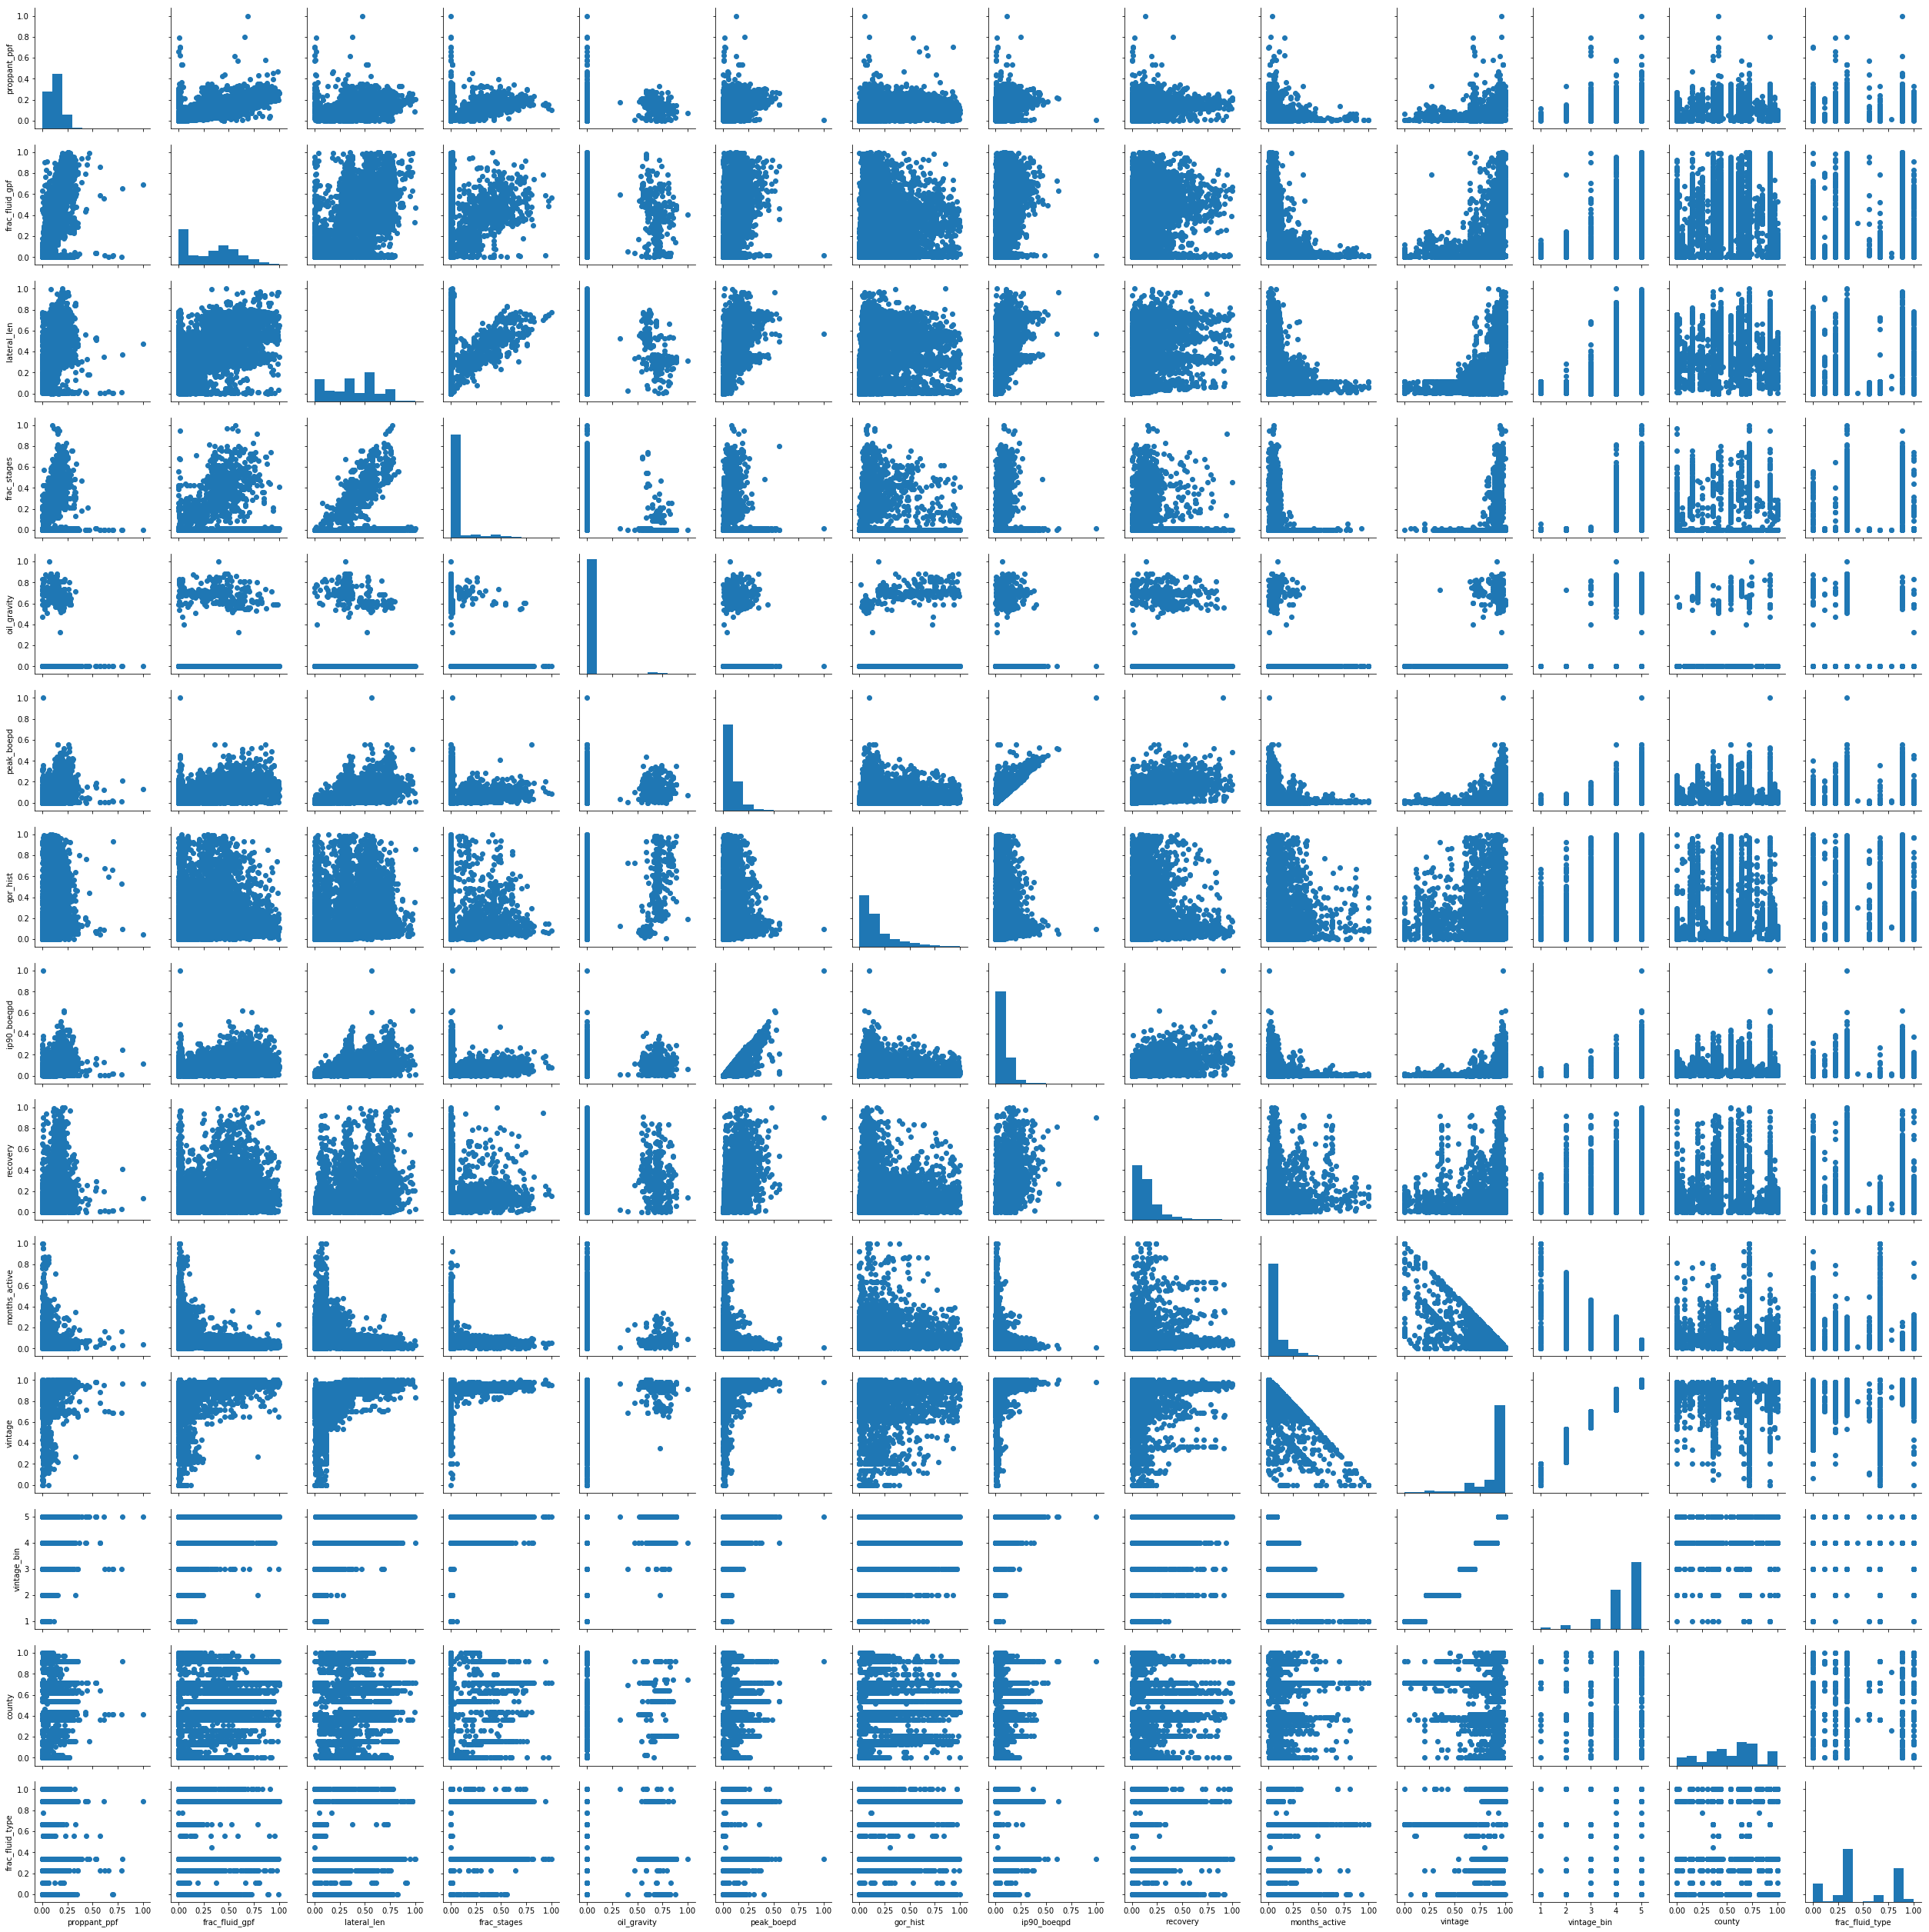

In [28]:
g = sns.PairGrid(scaled_df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

#### Create a heatmap of the correlation between each variable pair.

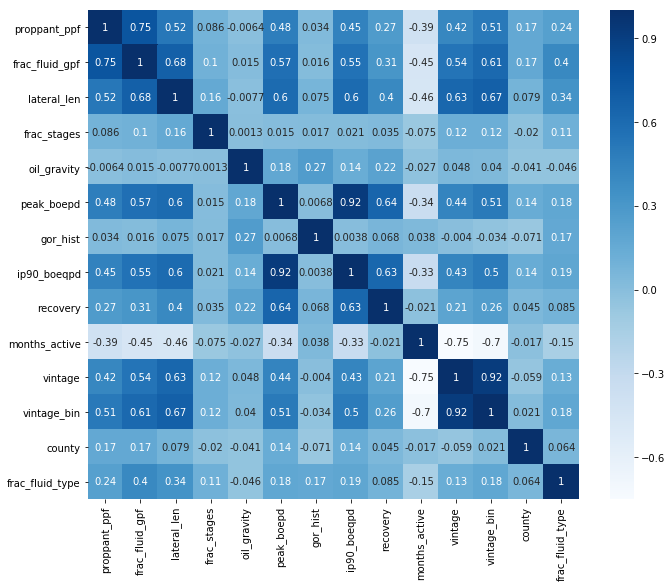

In [29]:
plt.figure(figsize=(11,9))

sns.heatmap(scaled_df.corr(), cmap='Blues', annot=True)

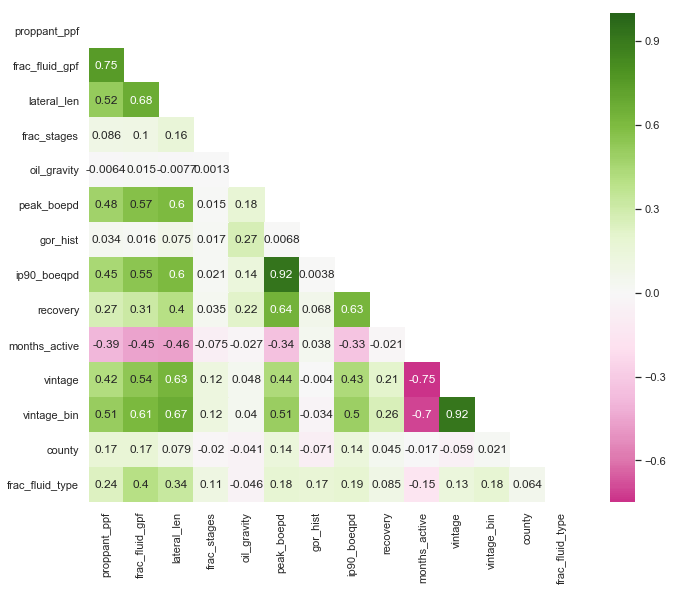

In [30]:
sns.set(style="white")

# Compute the correlation matrix
corr = scaled_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='PiYG', annot=True, center=0)

## So xgboost is showing proppant_ppf as a primer feature. However, it has only a .2 correlation with recovery.
## peak_boepd has the highest correlation with recovery at .64.
## ip90_boeqpd comes in second with a .63 correlation with recovery.
## lateral_len comes in third with only as .35 correlation with recovery.
## We still have a lot of outliers. I wonder if they are messing with these results.

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 1296x1008 with 0 Axes>

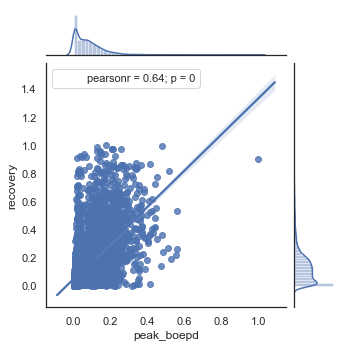

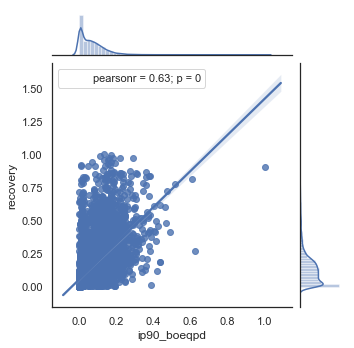

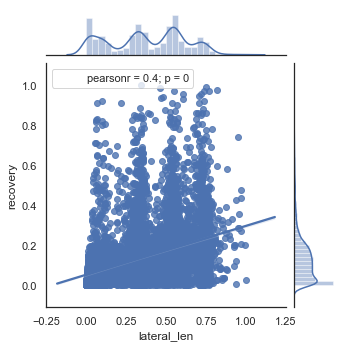

In [31]:
high_corr = ['peak_boepd', 'ip90_boeqpd', 'lateral_len']
plt.figure(figsize=(18,14))

with sns.axes_style('white'):
    for i, col in enumerate(high_corr):  
        j = sns.jointplot(col, 'recovery', data=scaled_df, kind='reg', height=5);
        j.annotate(stats.pearsonr)

plt.show()

## We might see more patterns in peak_boepd and ip90_boeqpd if we drop more outliers.
## The lateral_len is in clusters that are likely created by how many sections of land are purchased.

#### Use statsmodels ordinary least squares to assess the importance of each feature with respect to the target.
#### Drop rows with Nans because OLS cannot handle any Nans.

In [32]:
scaled_df.columns

Index(['proppant_ppf', 'frac_fluid_gpf', 'lateral_len', 'frac_stages',
       'oil_gravity', 'peak_boepd', 'gor_hist', 'ip90_boeqpd', 'recovery',
       'months_active', 'vintage', 'vintage_bin', 'county', 'frac_fluid_type'],
      dtype='object')

In [33]:
scaled_df.isnull().sum()

proppant_ppf       1210
frac_fluid_gpf        0
lateral_len           0
frac_stages         494
oil_gravity         240
peak_boepd            0
gor_hist              0
ip90_boeqpd           0
recovery              0
months_active         0
vintage               0
vintage_bin           0
county                0
frac_fluid_type       0
dtype: int64

In [34]:
scaled_df.dropna(subset=['proppant_ppf'], inplace=True)
scaled_df.dropna(subset=['frac_stages'], inplace=True)
scaled_df.dropna(subset=['oil_gravity'], inplace=True)
scaled_df.isnull().sum()

proppant_ppf       0
frac_fluid_gpf     0
lateral_len        0
frac_stages        0
oil_gravity        0
peak_boepd         0
gor_hist           0
ip90_boeqpd        0
recovery           0
months_active      0
vintage            0
vintage_bin        0
county             0
frac_fluid_type    0
dtype: int64

#### Then create train_test_split for OLS.

#### FIRST TRY:

In [35]:
# Independent variables:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf', 
          'months_active', 'lateral_len', 'ip90_boeqpd', 'county']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [36]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [37]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [38]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     2586.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:41:42   Log-Likelihood:                 5290.8
No. Observations:                5962   AIC:                        -1.057e+04
Df Residuals:                    5954   BIC:                        -1.051e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
proppant_ppf      -0.1721      0.027     -6.477      0.000      -0.224      -0.120
peak_boepd         0.9330      0.045     20.783      0.000       0.845       1.021
gor_hist           0.0481      0.007      7.036      0.000       0.035       0.062
frac_fluid_gpf     0.0297      0.009      3.235      0.001       0.012       0.048
months_active      0.3459      0.021     16.651      0.000       0.305       0.387
lateral_len        0.0567      0.008      7.393      0.000       0.042       0.072
ip90_boeqpd        0.5049      0.048     10.481      0.000       0.410       0.599
county            -0.0201      0.005     -4.239      0.000      -0.029      -0.011
==============================================================================
Omnibus:                     2966.123   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39530.458
Skew:                           2.050   Prob(JB):                         0.00
Kurtosis:                      14.929   Cond. No.                         43.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Asses if our data is a good fit for a linear regression... although I know we are going for a polynomial regression...

If the data is good for modeling, then our residuals will have certain characteristics. These characteristics are:

1. The data is “linear”. That is, the dependent variable is a linear function of independent variables and an error term e, and is largely dependent on characteristics 2-4. Think of the equation of a line in two dimensions: y = mx + b + e. yis the dependent or “response” variable, xis the input, mis the dimensional coefficient and bis the intercept (when x = 0). We can easily extend this “line” to higher dimensions by adding more inputs and coefficients, creating a hyperplane with the following form: y = a1\*x1+ a2\*x2+ … + an\*xn
2. Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.
3. There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction. 
4. The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.



Omnibus:	2966.123 -- NOT GOOD
- Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual. (Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.) We hope to see a value close to *zero* which would indicate normalcy. 


Prob(Omnibus):	0.000 -- SHOULD BE CLOSE TO 1
- The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something *close to 1* here. 

- In this case Omnibus is high and the Prob (Omnibus) is zero. A linear regression approach will not likely yield results as good as from a nonlinear approach.


Skew:	2.050 -- ???
- Skew – a measure of data symmetry. We want to see something close to *zero*, indicating the residual distribution is normal. Note that this value also drives the Omnibus. 


Kurtosis:	14.929	-- ??? 
- Kurtosis – a measure of “peakiness”, or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers. 


Durbin-Watson:	1.978 -- JUST BELOW 2, SO ACCEPTABLE
- Durbin-Watson – tests for homoscedasticity. (There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction.). 


Jarque-Bera (JB):	39530.458 -- OMNIBUS TEST YIELDED 2966.123
- Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test.  


Cond. No.:	43.8 -- OVER 30, SO LIKELY HAVE MULTICOLLINEARITY IN OUR DATA
- Condition Number – This test measures the sensitivity of a function’s output as compared to its input. (The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.) When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something *below 30*. 

# We might be able to improve these numbers by dropping some features.
#### SECOND TRY:

In [39]:
# Independent variables:
X_vars = ['proppant_ppf', 'frac_fluid_gpf', 
          'months_active', 'lateral_len', 'county']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [40]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [41]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [42]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2058.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:41:47   Log-Likelihood:                 3815.2
No. Observations:                5962   AIC:                            -7620.
Df Residuals:                    5957   BIC:                            -7587.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
proppant_ppf       0.0197      0.033      0.588      0.557      -0.046       0.085
frac_fluid_gpf     0.0984      0.012      8.471      0.000       0.076       0.121
months_active      0.2376      0.025      9.518      0.000       0.189       0.287
lateral_len        0.2218      0.009     24.680      0.000       0.204       0.239
county             0.0022      0.006      0.373      0.709      -0.010       0.014
==============================================================================
Omnibus:                     3071.342   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22725.955
Skew:                           2.379   Prob(JB):                         0.00
Kurtosis:                      11.297   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If the data is good for modeling, then our residuals will have certain characteristics. These characteristics are:

1. The data is “linear”. That is, the dependent variable is a linear function of independent variables and an error term e, and is largely dependent on characteristics 2-4. Think of the equation of a line in two dimensions: y = mx + b + e. yis the dependent or “response” variable, xis the input, mis the dimensional coefficient and bis the intercept (when x = 0). We can easily extend this “line” to higher dimensions by adding more inputs and coefficients, creating a hyperplane with the following form: y = a1\*x1+ a2\*x2+ … + an\*xn
2. Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.
3. There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction. 
4. The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.



Omnibus:	3071.342 -- WORSE
- Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual. (Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.) We hope to see a value close to *zero* which would indicate normalcy. 


Prob(Omnibus):	0.000 -- SHOULD BE CLOSE TO 1
- The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something *close to 1* here. 

- In this case Omnibus is high and the Prob (Omnibus) is zero. A linear regression approach will not likely yield results as good as from a nonlinear approach.


Skew:	2.379	-- WORSE
- Skew – a measure of data symmetry. We want to see something close to *zero*, indicating the residual distribution is normal. Note that this value also drives the Omnibus. 


Kurtosis:	11.297	-- WORSE 
- Kurtosis – a measure of “peakiness”, or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers. 


Durbin-Watson:	1.998 -- BETTER!
- Durbin-Watson – tests for homoscedasticity. (There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction.). 


Jarque-Bera (JB):	22725.955 -- OMNIBUS TEST YIELDED 3071.342
- Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test.  


Cond. No.:	17.9 -- MUCH BETTER!
- Condition Number – This test measures the sensitivity of a function’s output as compared to its input. (The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.) When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something *below 30*. 

#### THIRD TRY:

In [43]:
# Independent variables:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [44]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [45]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [46]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     4623.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:41:51   Log-Likelihood:                 5033.3
No. Observations:                5962   AIC:                        -1.006e+04
Df Residuals:                    5958   BIC:                        -1.003e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
proppant_ppf      -0.1233      0.027     -4.549      0.000      -0.176      -0.070
peak_boepd         1.3906      0.022     64.431      0.000       1.348       1.433
gor_hist           0.1078      0.006     16.825      0.000       0.095       0.120
frac_fluid_gpf     0.0629      0.009      7.222      0.000       0.046       0.080
==============================================================================
Omnibus:                     2476.938   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32596.447
Skew:                           1.622   Prob(JB):                         0.00
Kurtosis:                      13.986   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

FOURTH TRY:

In [47]:
# Independent variables:
X_vars = ['gor_hist', 'frac_fluid_gpf', 'months_active', 'lateral_len']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [48]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [49]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [50]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     2581.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:41:54   Log-Likelihood:                 3821.0
No. Observations:                5962   AIC:                            -7634.
Df Residuals:                    5958   BIC:                            -7607.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gor_hist           0.0302      0.009      3.498      0.000       0.013       0.047
frac_fluid_gpf     0.1037      0.008     12.233      0.000       0.087       0.120
months_active      0.2153      0.024      9.137      0.000       0.169       0.262
lateral_len        0.2161      0.009     24.551      0.000       0.199       0.233
==============================================================================
Omnibus:                     3089.252   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23107.472
Skew:                           2.393   Prob(JB):                         0.00
Kurtosis:                      11.374   Cond. No.                         9.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

```
WHAT WE WANT:
Omnibus:	CLOSE TO ZERO       Durbin-Watson:	avoid error rate growing in particular direction
Prob(Omnibus):	CLOSE TO ONE    Jarque-Bera (JB):	SAME AS OMNIBUS
Skew:	CLOSE TO ZERO           Prob(JB):	???
Kurtosis:	HIGHER THE BETTER?  Cond. No.	BELOW THIRTY

first test:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf', 
          'months_active', 'lateral_len', 'ip90_boeqpd', 'county']
Omnibus:	2966.123    Durbin-Watson:	1.978
Prob(Omnibus):	0.000   Jarque-Bera (JB):	39530.458
Skew:	2.050           Prob(JB):	0.00
Kurtosis:	14.929      Cond. No.	43


second test:
X_vars = ['proppant_ppf', 'frac_fluid_gpf', 'months_active', 'lateral_len', 'county']
Omnibus:	3071.342    Durbin-Watson:	1.998
Prob(Omnibus):	0.000   Jarque-Bera (JB):	22725.955
Skew:	2.379           Prob(JB):	0.00
Kurtosis:	11.297      Cond. No.	17.9


third test:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf']
Omnibus:	2476.938    Durbin-Watson:	1.980
Prob(Omnibus):	0.000   Jarque-Bera (JB):	32596.447
Skew:	1.622           Prob(JB):	0.00
Kurtosis:	13.986      Cond. No.	11.0

fourth test:
X_vars = ['gor_hist', 'frac_fluid_gpf', 'months_active', 'lateral_len']
Omnibus:	3089.252    Durbin-Watson:	2.000
Prob(Omnibus):	0.000   Jarque-Bera (JB):	23107.472
Skew:	2.393           Prob(JB):	0.00
Kurtosis:	11.374      Cond. No.	9.83

```

- Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual. (Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.) We hope to see a value close to *zero* which would indicate normalcy. 

- The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something *close to 1* here. 

    - In this case Omnibus is high and the Prob (Omnibus) is zero. A linear regression approach will not likely yield results as good as from a nonlinear approach.

- Skew – a measure of data symmetry. We want to see something close to *zero*, indicating the residual distribution is normal. Note that this value also drives the Omnibus. 

- Kurtosis – a measure of “peakiness”, or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers. 

- Durbin-Watson – tests for homoscedasticity. (There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction.). 

- Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test.  

- Condition Number – This test measures the sensitivity of a function’s output as compared to its input. (The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.) When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something *below 30*. 